<a href="https://colab.research.google.com/github/pkv-woodstock/commodity_crop_price_predictor/blob/main/Commodity_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load and Inspect Data

In [1]:
import pandas as pd

In [2]:
# Load the data
file_path = '/content/ncdex_stock_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Symbol,Expiry Date,Commodity,Ex-Basis Delivery Centre,Price Unit,Previous Closing Price,Opening Price,High Price,Low Price,Closing Price,Quantity Traded Today,Measure,No of Trades,Traded Value in Lacs,Open Interest,LastTradedDate,Unnamed: 16,Date
0,0,DHAANYA,2018-12-03 00:00:00,NCDEX FUTURE INDEX,NaN,NaN,3384.58,3381.89,3411.09,3381.2,3394.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 00:00:00
1,1,BARLEYJPR,2018-12-20 00:00:00,BARLEY,JAIPUR,RS/QUINTAL,1823.00,1812.00,1816.00,1812.0,1814.00,20.0,MT,2.0,3.63,1960.0,12/3/2018,NaN,2018-12-03 00:00:00
2,2,BARLEYJPR,2019-01-18 00:00:00,BARLEY,JAIPUR,RS/QUINTAL,1895.00,0.00,0.00,0.0,1895.00,0.0,MT,0.0,0.00,450.0,11/30/2018,NaN,2018-12-03 00:00:00
3,3,BARLEYJPR,2019-04-16 00:00:00,BARLEY,JAIPUR,RS/QUINTAL,1550.00,0.00,0.00,0.0,1550.00,0.0,MT,0.0,0.00,0.0,NOTRADE,NaN,2018-12-03 00:00:00
4,4,BARLEYJPR,2019-05-20 00:00:00,BARLEY,JAIPUR,RS/QUINTAL,1550.00,0.00,0.00,0.0,1550.00,0.0,MT,0.0,0.00,0.0,NOTRADE,NaN,2018-12-03 00:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4087 non-null   int64  
 1   Symbol                    4086 non-null   object 
 2   Expiry Date               4085 non-null   object 
 3   Commodity                 4085 non-null   object 
 4   Ex-Basis Delivery Centre  4041 non-null   object 
 5   Price Unit                4041 non-null   object 
 6   Previous Closing Price    4085 non-null   float64
 7   Opening Price             4085 non-null   float64
 8   High Price                4085 non-null   float64
 9   Low Price                 4085 non-null   float64
 10  Closing Price             4085 non-null   float64
 11  Quantity Traded Today     4041 non-null   float64
 12  Measure                   4041 non-null   object 
 13  No of Trades              4041 non-null   float64
 14  Traded V

In [5]:
# Select relevant columns
columns = ['Symbol', 'Date', 'Opening Price', 'High Price', 'Low Price', 'Closing Price', 'Quantity Traded Today']
data = data[columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 4086 non-null   object 
 1   Date                   4087 non-null   object 
 2   Opening Price          4085 non-null   float64
 3   High Price             4085 non-null   float64
 4   Low Price              4085 non-null   float64
 5   Closing Price          4085 non-null   float64
 6   Quantity Traded Today  4041 non-null   float64
dtypes: float64(5), object(2)
memory usage: 223.6+ KB


In [7]:
data.head()

,Symbol,Date,Opening Price,High Price,Low Price,Closing Price,Quantity Traded Today
0,DHAANYA,2018-12-03 00:00:00,3381.89,3411.09,3381.2,3394.75,NaN
1,BARLEYJPR,2018-12-03 00:00:00,1812.00,1816.00,1812.0,1814.00,20.0
2,BARLEYJPR,2018-12-03 00:00:00,0.00,0.00,0.0,1895.00,0.0
3,BARLEYJPR,2018-12-03 00:00:00,0.00,0.00,0.0,1550.00,0.0
4,BARLEYJPR,2018-12-03 00:00:00,0.00,0.00,0.0,1550.00,0.0


In [8]:
# Handle missing values by dropping them
data = data.dropna()
data.shape

(4041, 7)

In [9]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.head(10)

,Symbol,Date,Opening Price,High Price,Low Price,Closing Price,Quantity Traded Today
1,BARLEYJPR,2018-12-03,1812.0,1816.0,1812.0,1814.0,20.0
2,BARLEYJPR,2018-12-03,0.0,0.0,0.0,1895.0,0.0
3,BARLEYJPR,2018-12-03,0.0,0.0,0.0,1550.0,0.0
4,BARLEYJPR,2018-12-03,0.0,0.0,0.0,1550.0,0.0
5,BARLEYJPR,2018-12-03,0.0,0.0,0.0,1550.0,0.0
6,CASTOR,2018-12-03,5392.0,5560.0,5392.0,5560.0,41270.0
7,CASTOR,2018-12-03,5480.0,5644.0,5480.0,5622.0,43660.0
8,CASTOR,2018-12-03,5594.0,5714.0,5572.0,5708.0,3130.0
9,CASTOR,2018-12-03,5638.0,5772.0,5638.0,5772.0,560.0
10,CASTOR,2018-12-03,0.0,0.0,0.0,5772.0,0.0


### 2. Preprocessing and Feature Engineering

In [11]:
# Function to add features
def add_features(df):
    df['MA_5'] = df['Closing Price'].rolling(window=5).mean()
    df['MA_10'] = df['Closing Price'].rolling(window=10).mean()
    df['Price Range'] = df['High Price'] - df['Low Price']
    df['Daily Change'] = df['Closing Price'] - df['Opening Price']
    df = df.dropna()
    return df

In [12]:
# Separate data by symbol and add features
symbols = data['Symbol'].unique()
symbol_data = {}

In [13]:
symbols

array(['BARLEYJPR', 'CASTOR', 'CHANA', 'COCUDAKL', 'COTTON', 'CPO',
       'DHANIYA', 'GUARGUM5', 'GUARSEED10', 'JEERAUNJHA', 'KAPAS',
       'MAIZEKHRIF', 'MAIZERABI', 'PEPPER', 'RMSEED', 'SUGARM',
       'SYBEANIDR', 'SYOREF', 'TMCFGRNZM', 'WHEATFAQ'], dtype=object)

In [14]:
for symbol in symbols:
    symbol_df = data[data['Symbol'] == symbol].copy()
    symbol_df = add_features(symbol_df)
    symbol_data[symbol] = symbol_df

In [15]:
symbol_data

{'BARLEYJPR':          Symbol       Date  Opening Price  High Price  Low Price  \
 105   BARLEYJPR 2018-12-04            0.0         0.0        0.0   
 201   BARLEYJPR 2018-12-05         1824.0      1824.0     1810.0   
 202   BARLEYJPR 2018-12-05         1898.0      1898.0     1860.5   
 203   BARLEYJPR 2018-12-05            0.0         0.0        0.0   
 204   BARLEYJPR 2018-12-05            0.0         0.0        0.0   
 ...         ...        ...            ...         ...        ...   
 3912  BARLEYJPR 2019-01-31            0.0         0.0        0.0   
 3991  BARLEYJPR 2019-02-01         1690.0      1690.0     1684.0   
 3992  BARLEYJPR 2019-02-01            0.0         0.0        0.0   
 3993  BARLEYJPR 2019-02-01            0.0         0.0        0.0   
 3994  BARLEYJPR 2019-02-01            0.0         0.0        0.0   
 
       Closing Price  Quantity Traded Today    MA_5    MA_10  Price Range  \
 105          1550.0                    0.0  1669.2  1670.50          0.0   
 20

In [16]:
for symbol, symbol_df in symbol_data.items():
    num_rows = len(symbol_df)
    print(f'{symbol}, Number of samples: {num_rows}')

BARLEYJPR, Number of samples: 195
CASTOR, Number of samples: 196
CHANA, Number of samples: 196
COCUDAKL, Number of samples: 196
COTTON, Number of samples: 283
CPO, Number of samples: 211
DHANIYA, Number of samples: 152
GUARGUM5, Number of samples: 196
GUARSEED10, Number of samples: 196
JEERAUNJHA, Number of samples: 152
KAPAS, Number of samples: 80
MAIZEKHRIF, Number of samples: 196
MAIZERABI, Number of samples: 74
PEPPER, Number of samples: 127
RMSEED, Number of samples: 239
SUGARM, Number of samples: 225
SYBEANIDR, Number of samples: 242
SYOREF, Number of samples: 328
TMCFGRNZM, Number of samples: 181
WHEATFAQ, Number of samples: 196


### 3. Exploratory Data Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information: ")
print(data.info())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
Index: 4041 entries, 1 to 4086
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Symbol                 4041 non-null   object        
 1   Date                   4041 non-null   datetime64[ns]
 2   Opening Price          4041 non-null   float64       
 3   High Price             4041 non-null   float64       
 4   Low Price              4041 non-null   float64       
 5   Closing Price          4041 non-null   float64       
 6   Quantity Traded Today  4041 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 252.6+ KB
None


In [19]:
# Summary
print(f"Summary: {data.describe()}")


Summary:                                 Date  Opening Price    High Price  \
count                           4041    4041.000000   4041.000000   
mean   2019-01-01 07:39:41.291759616    2253.268213   2268.374487   
min              2018-12-03 00:00:00       0.000000      0.000000   
25%              2018-12-17 00:00:00       0.000000      0.000000   
50%              2019-01-02 00:00:00       0.000000      0.000000   
75%              2019-01-17 00:00:00    3986.000000   3998.000000   
max              2019-02-01 00:00:00   19050.000000  19515.000000   
std                              NaN    3683.404172   3706.822483   

          Low Price  Closing Price  Quantity Traded Today  
count   4041.000000    4041.000000            4041.000000  
mean    2235.802165    6447.143813            4172.096263  
min        0.000000     479.600000               0.000000  
25%        0.000000    1697.000000               0.000000  
50%        0.000000    3906.000000               0.000000  
75%     3

In [20]:
# Check for missing values
data.isnull().sum()

Symbol                   0
Date                     0
Opening Price            0
High Price               0
Low Price                0
Closing Price            0
Quantity Traded Today    0
dtype: int64

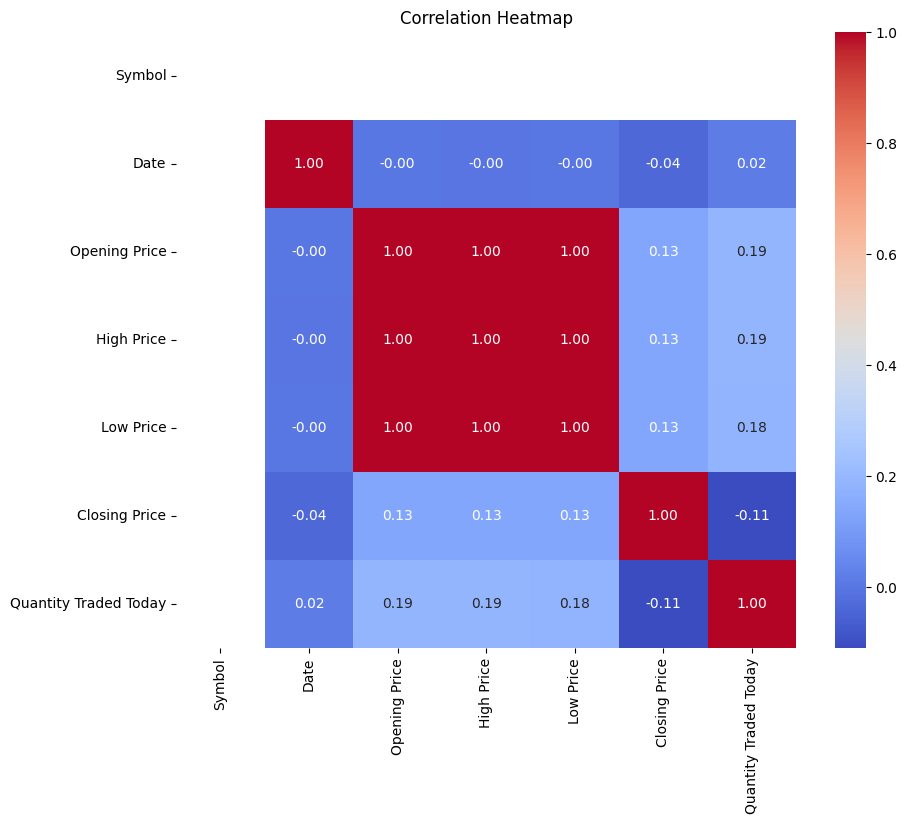

In [22]:
# Correlation heatmap
data_num = data[columns].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

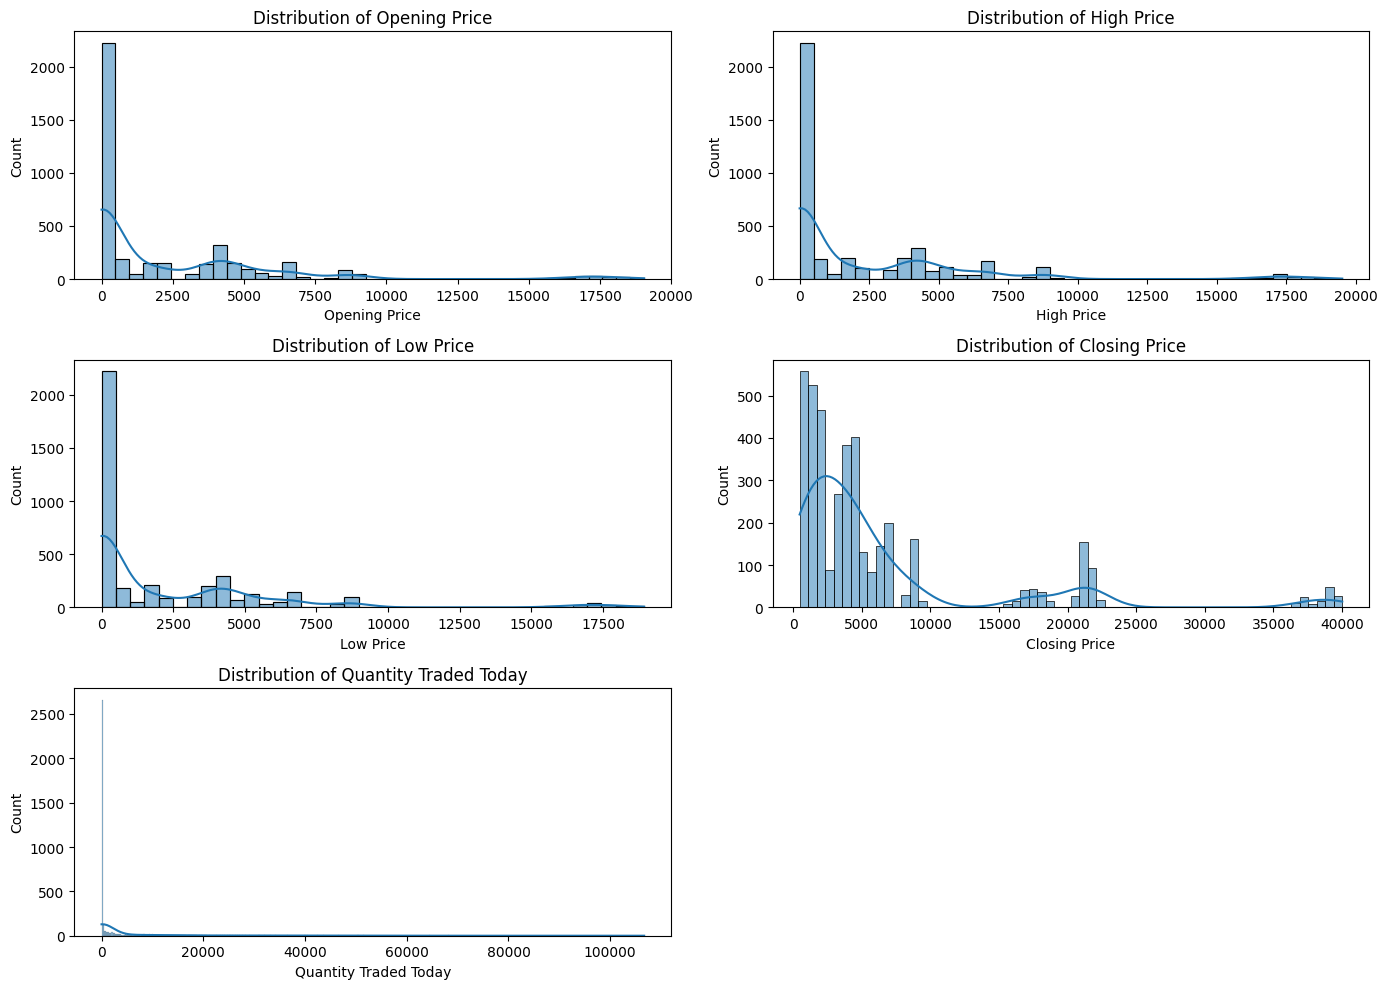

In [26]:
# Distribution of numerical features
numerical_features = ['Opening Price', 'High Price', 'Low Price', 'Closing Price', 'Quantity Traded Today']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

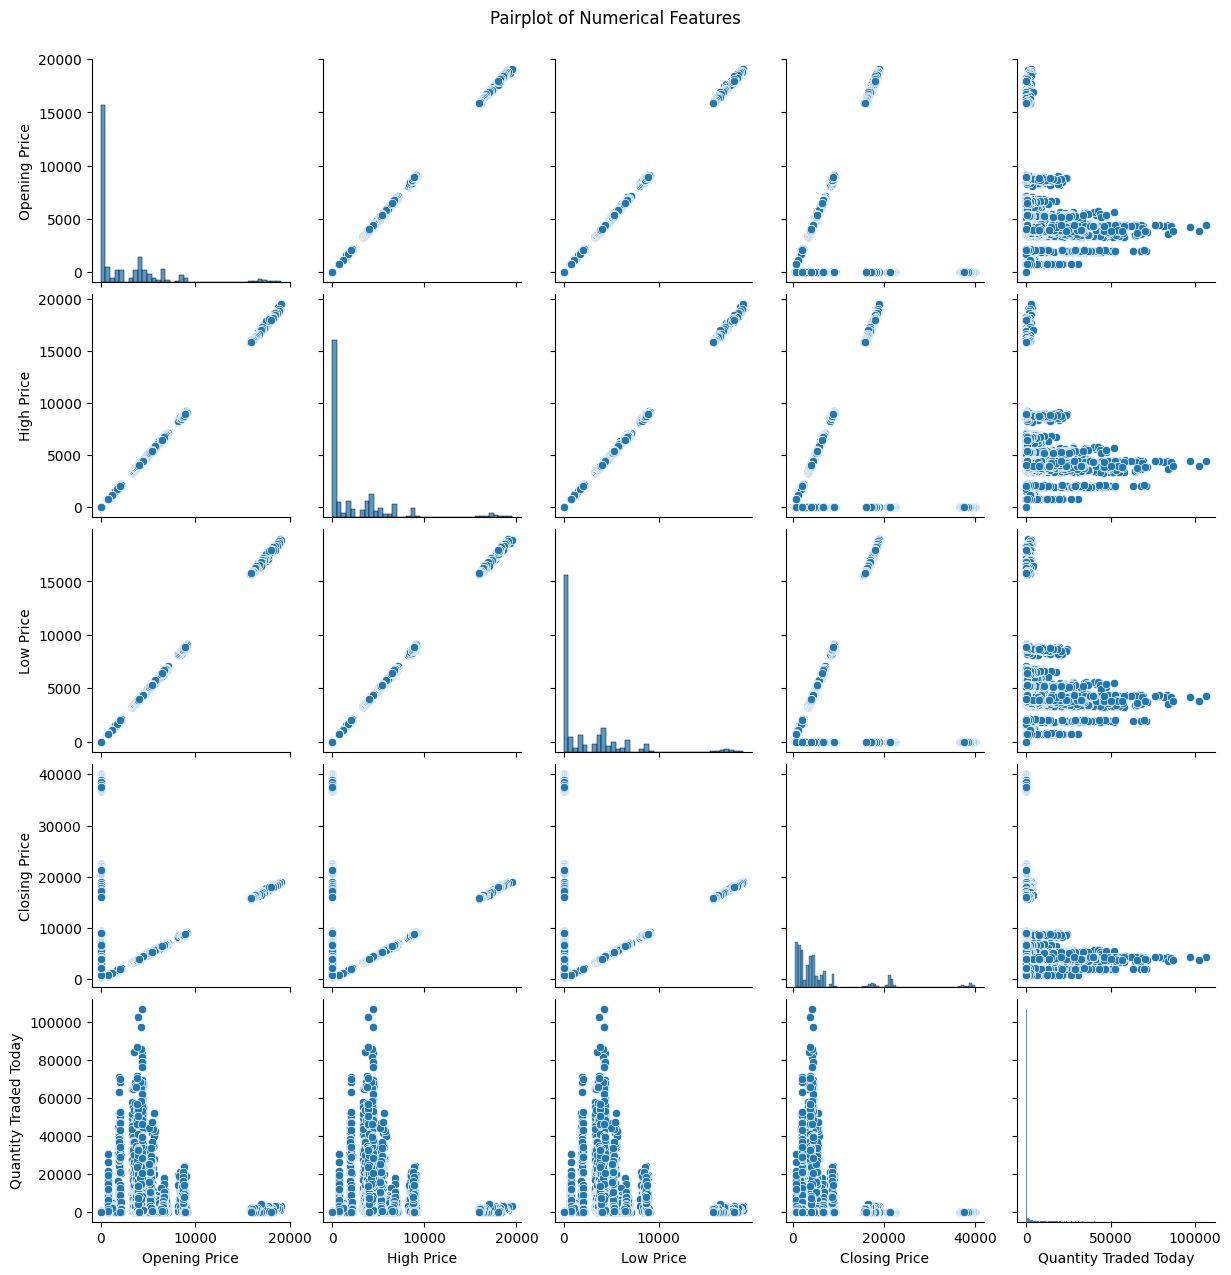

In [24]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### 4. Model Training and Evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train and evaluate model for each symbol
results = {}

for symbol, symbol_df in symbol_data.items():
    # Features and target variable
    features = ['Opening Price', 'High Price', 'Low Price', 'Quantity Traded Today', 'MA_5', 'MA_10', 'Price Range', 'Daily Change']
    target = 'Closing Price'

    X = symbol_df[features]
    y = symbol_df[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)

    # Store the results
    results[symbol] = {
        'model': model,
        'mse': mse,
        'y_test': y_test,
        'y_pred': y_pred
    }
    print(f'Symbol: {symbol}, Mean Squared Error: {mse}')

Symbol: BARLEYJPR, Mean Squared Error: 10.732031410256253
Symbol: CASTOR, Mean Squared Error: 600.215359999999
Symbol: CHANA, Mean Squared Error: 1155.4858199999994
Symbol: COCUDAKL, Mean Squared Error: 108.93349499999991
Symbol: COTTON, Mean Squared Error: 116.41228070175868
Symbol: CPO, Mean Squared Error: 0.40681265116269305
Symbol: DHANIYA, Mean Squared Error: 5302.953390322593
Symbol: GUARGUM5, Mean Squared Error: 1944.8490474999944
Symbol: GUARSEED10, Mean Squared Error: 149.99165749999992
Symbol: JEERAUNJHA, Mean Squared Error: 20015.155403225766
Symbol: KAPAS, Mean Squared Error: 10.617282812499958
Symbol: MAIZEKHRIF, Mean Squared Error: 332.72571250000016
Symbol: MAIZERABI, Mean Squared Error: 376.00305333333216
Symbol: PEPPER, Mean Squared Error: 1822.57365384611
Symbol: RMSEED, Mean Squared Error: 368.1722229166676
Symbol: SUGARM, Mean Squared Error: 0.1590777777777777
Symbol: SYBEANIDR, Mean Squared Error: 543.8049591836746
Symbol: SYOREF, Mean Squared Error: 3.461493886363

### 5. Visualization of Results

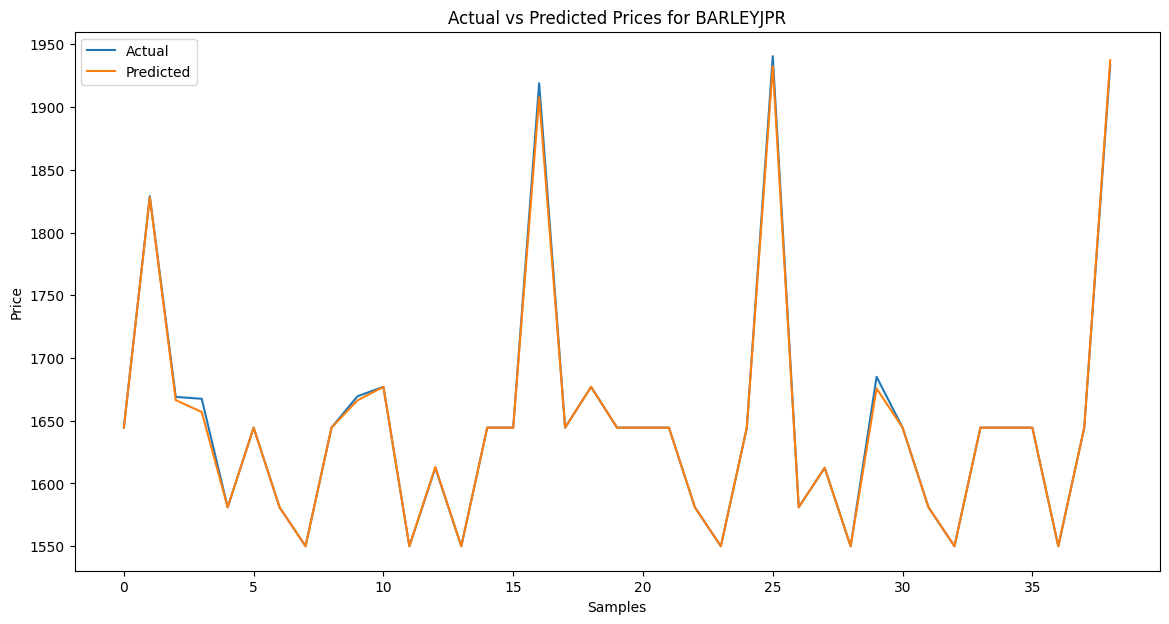

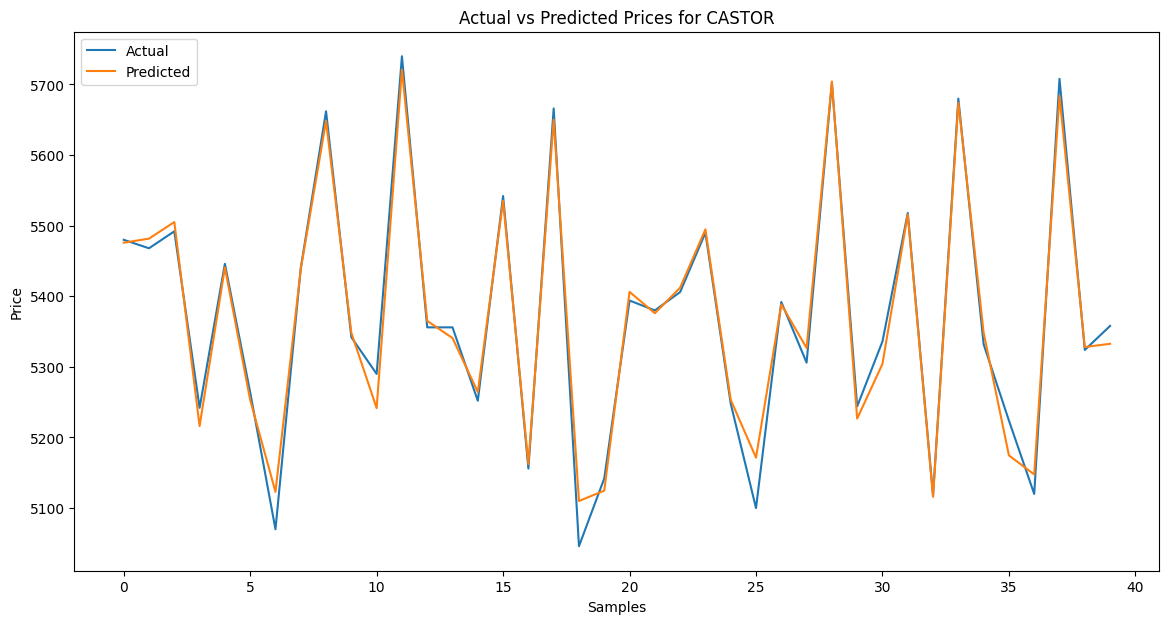

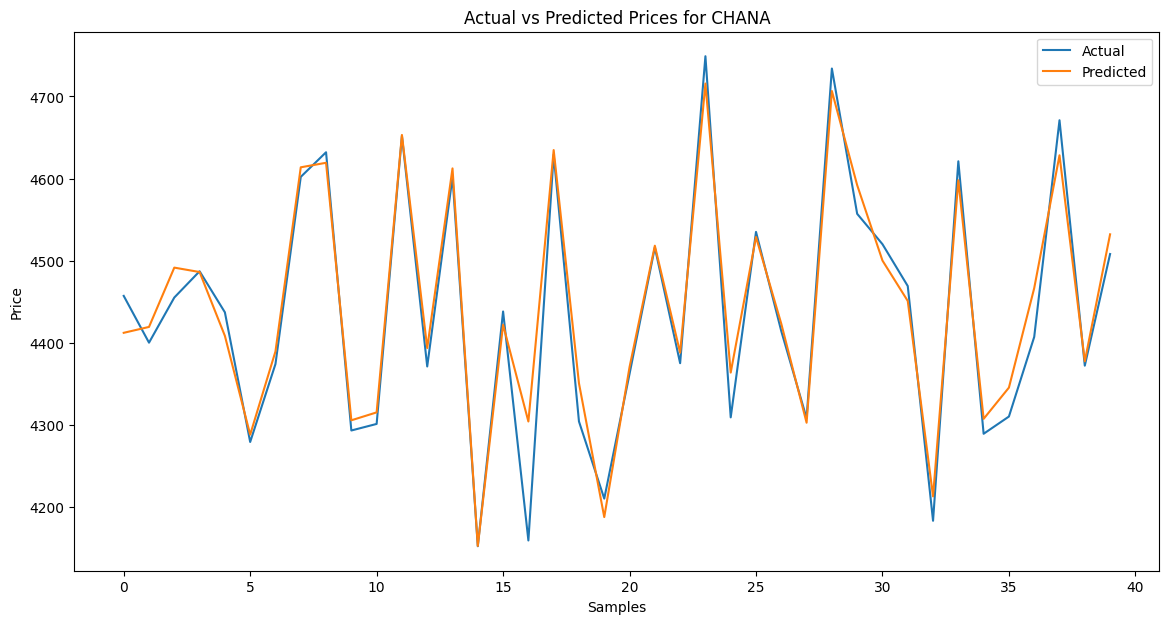

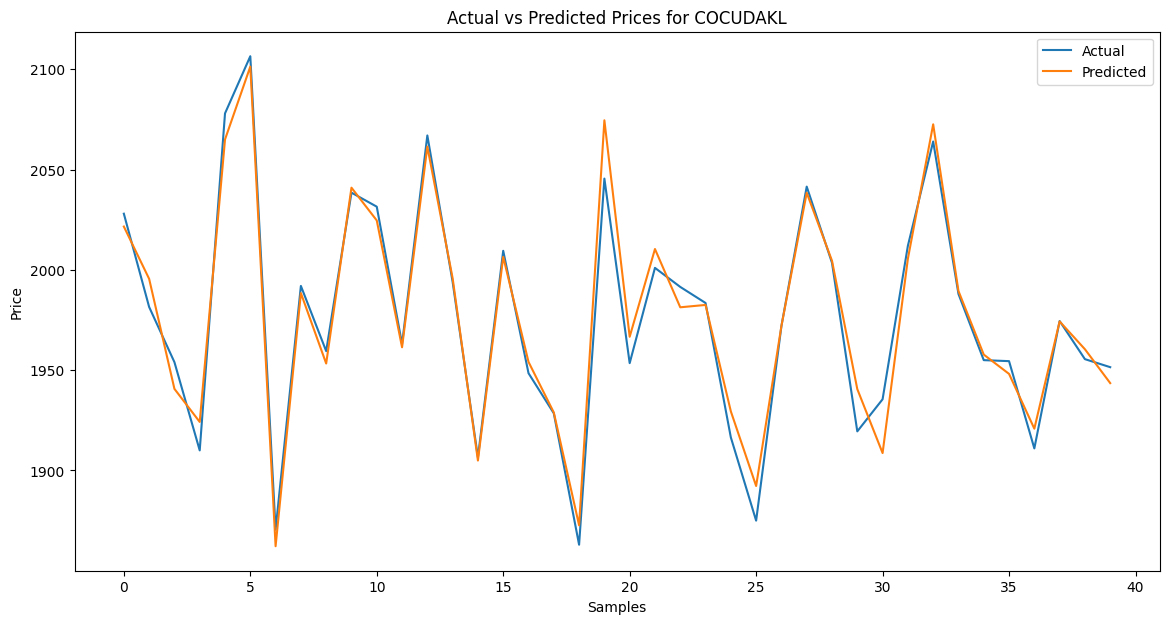

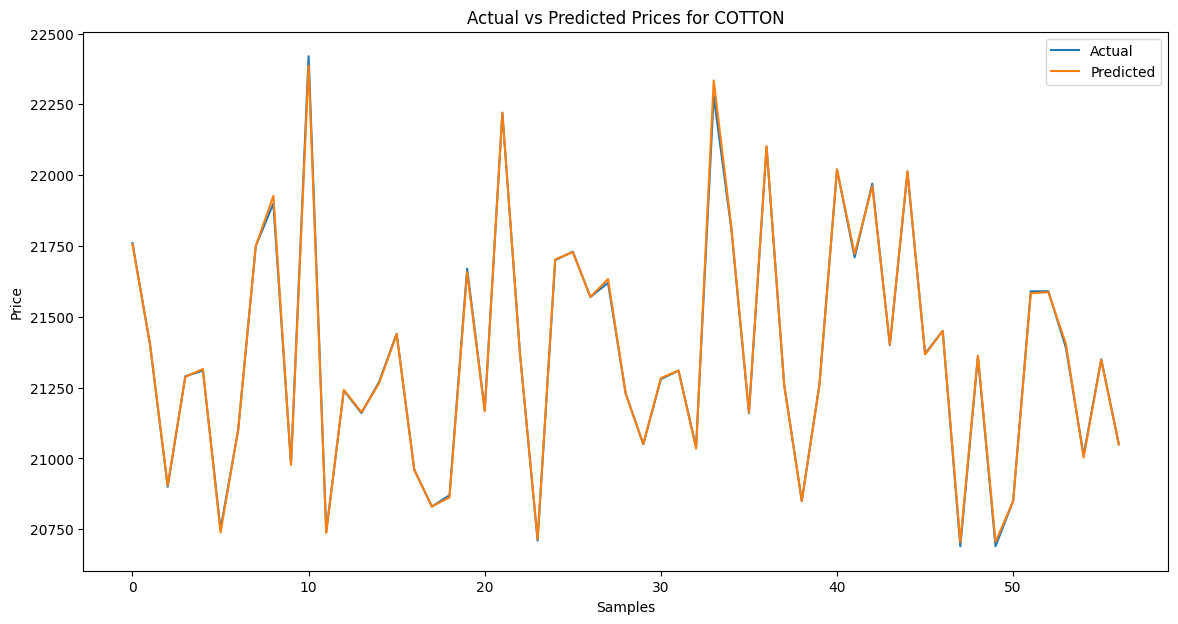

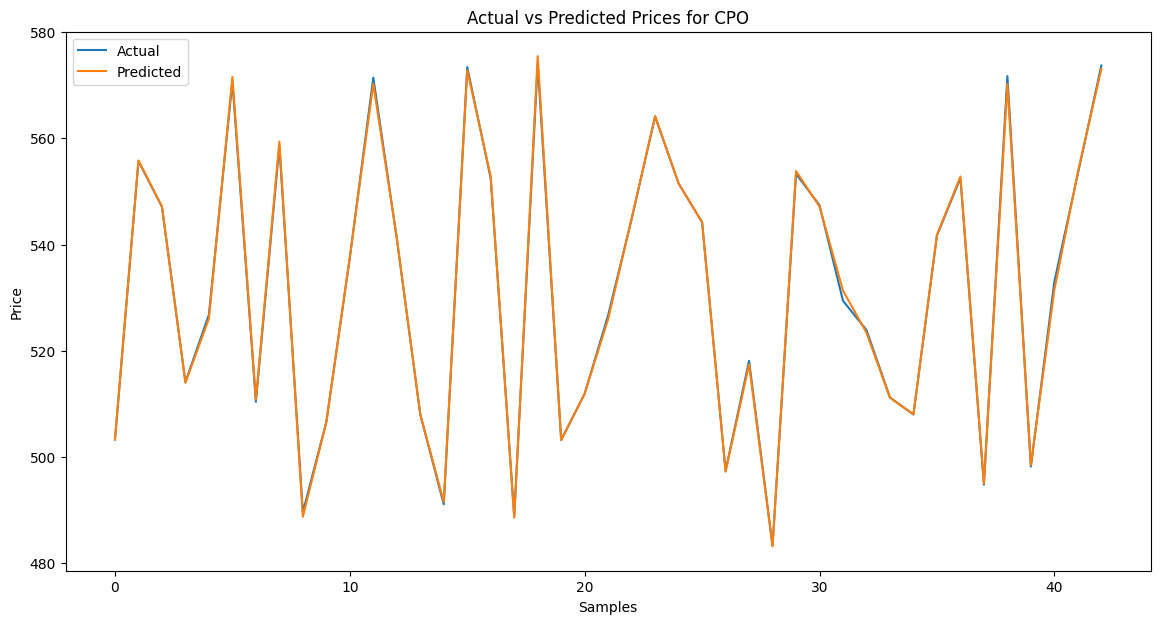

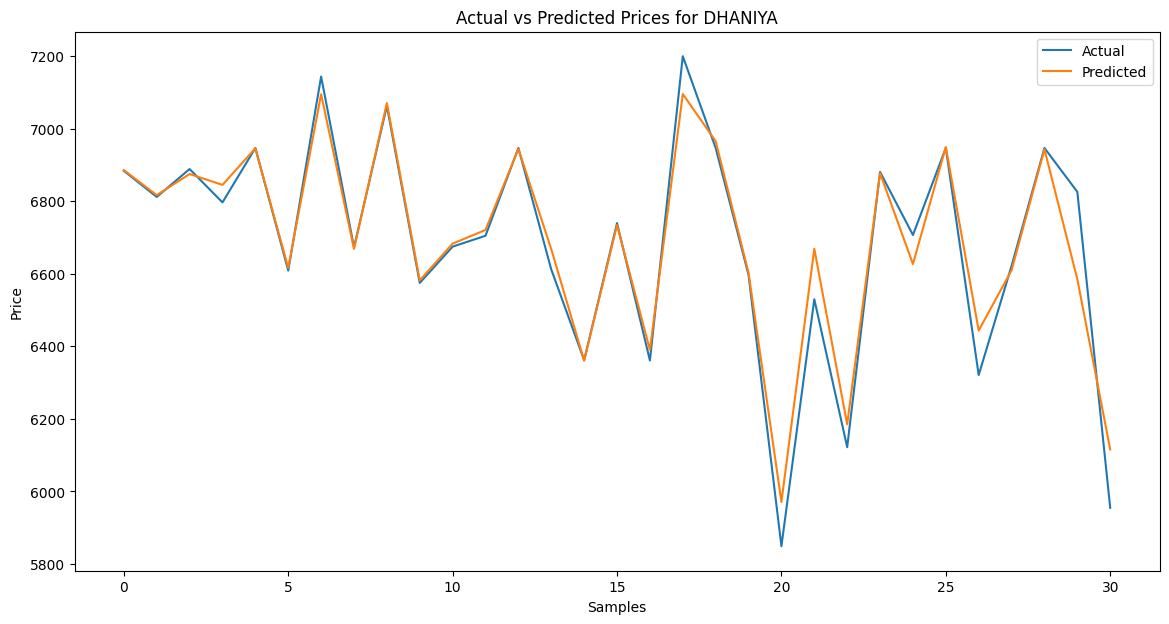

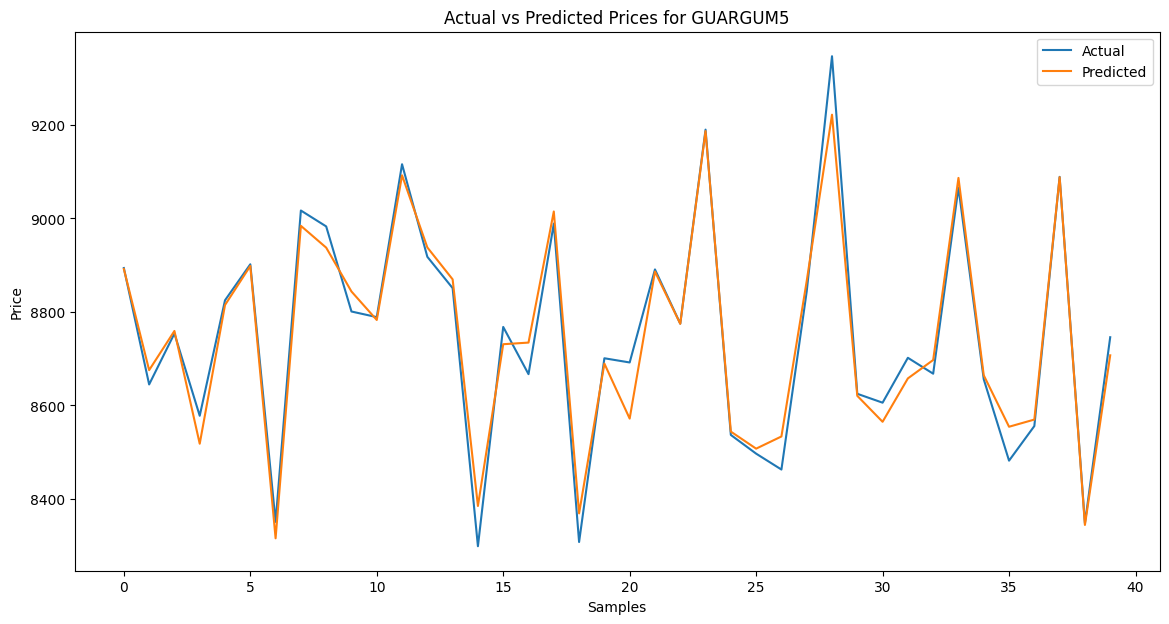

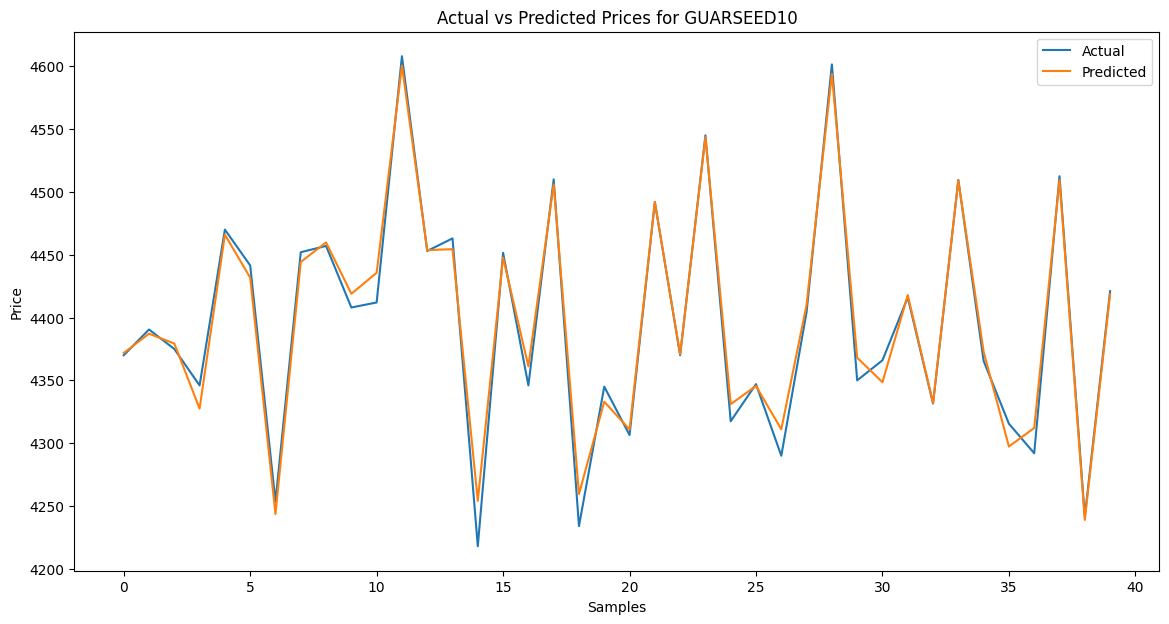

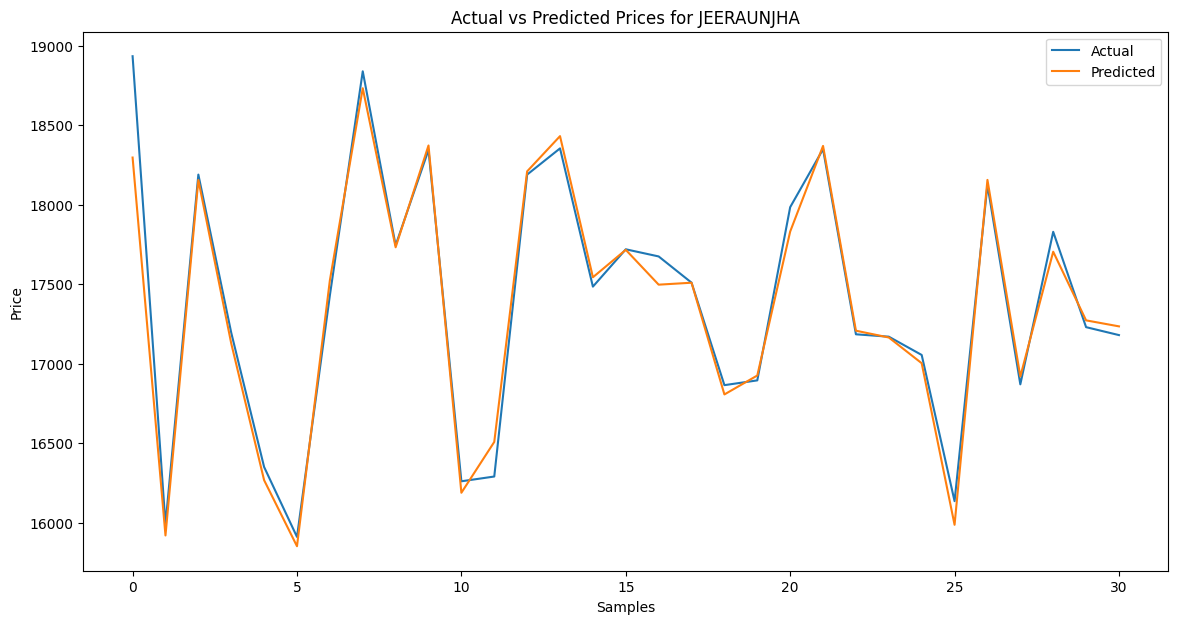

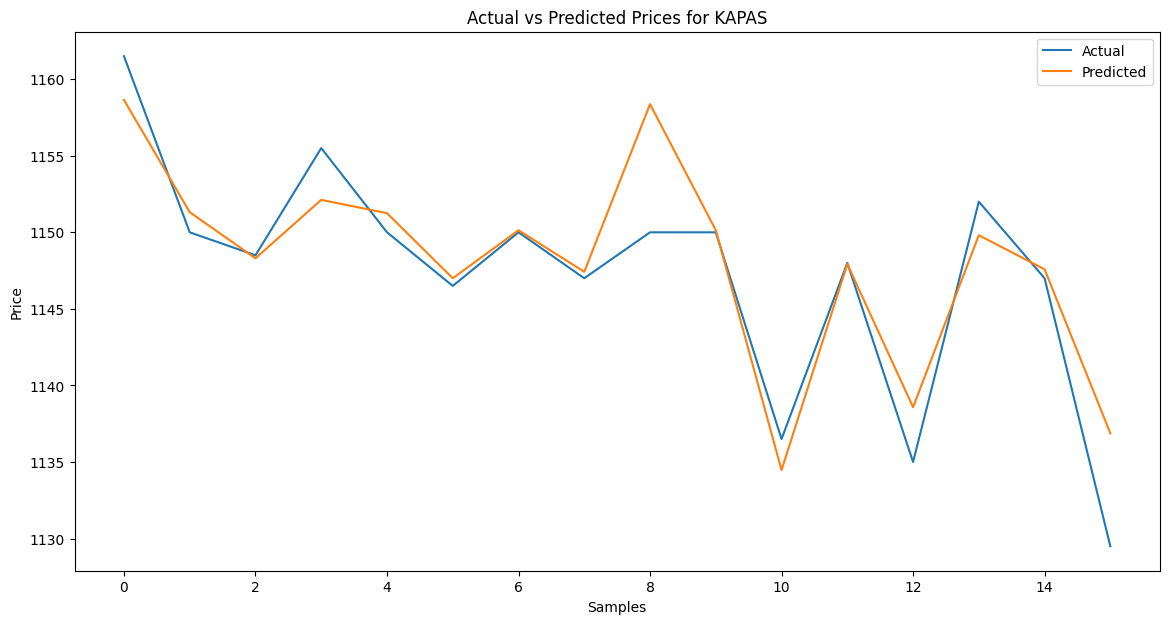

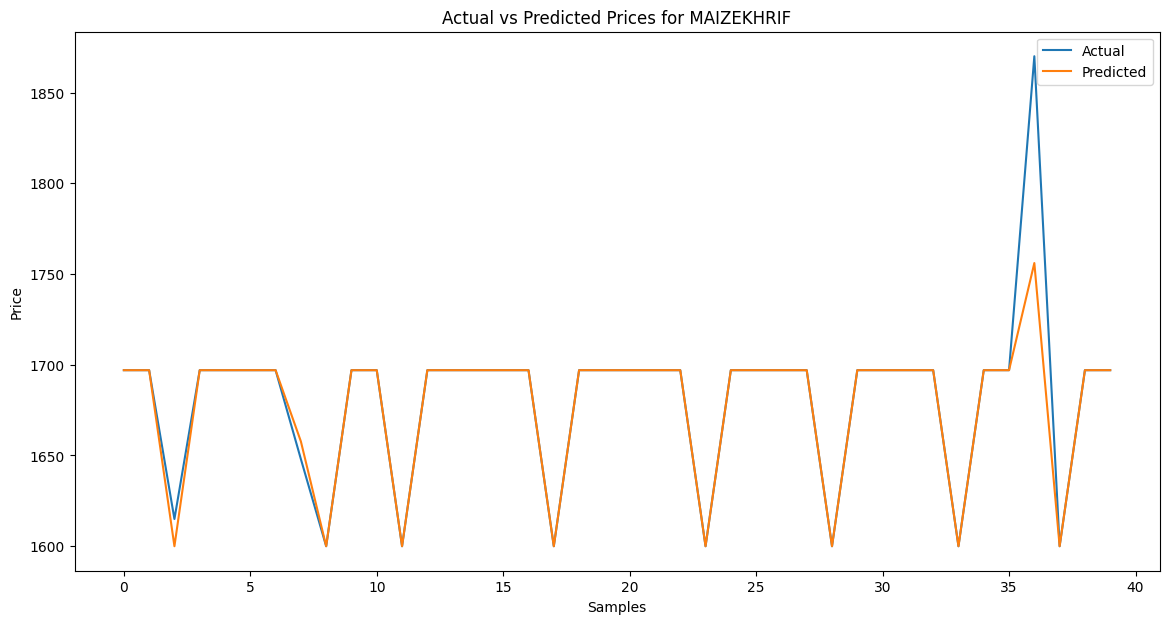

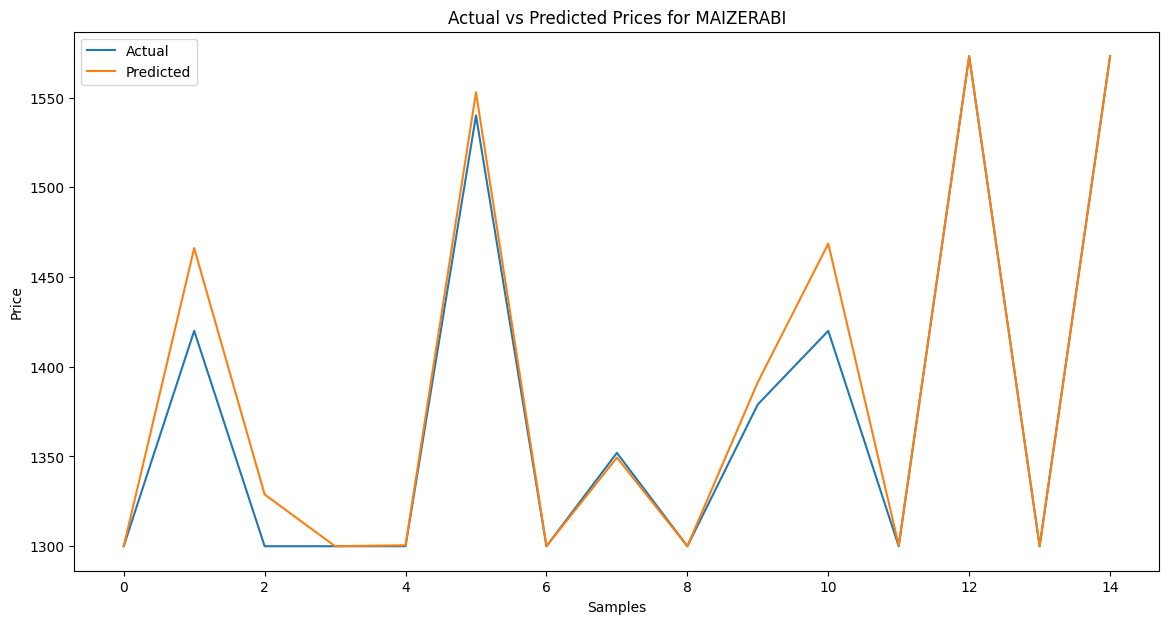

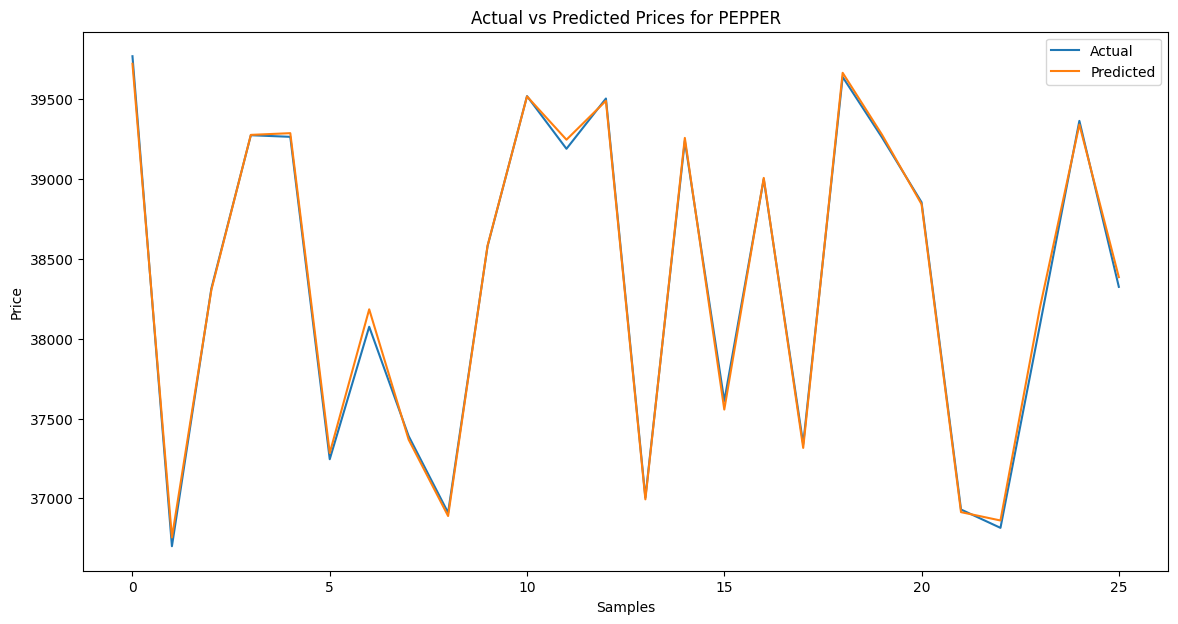

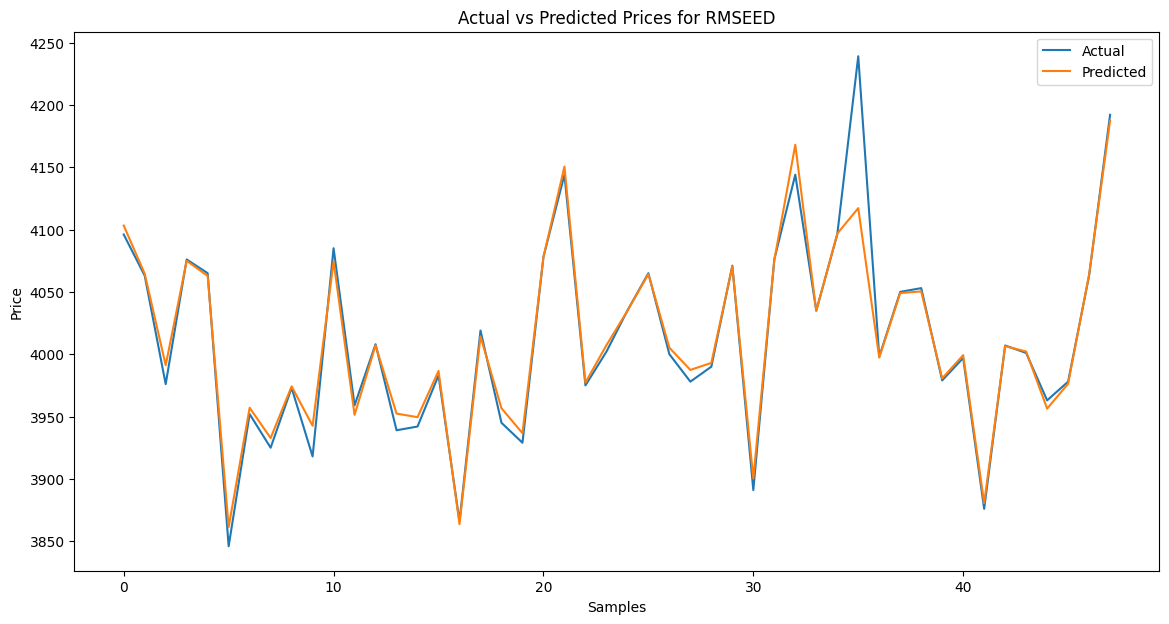

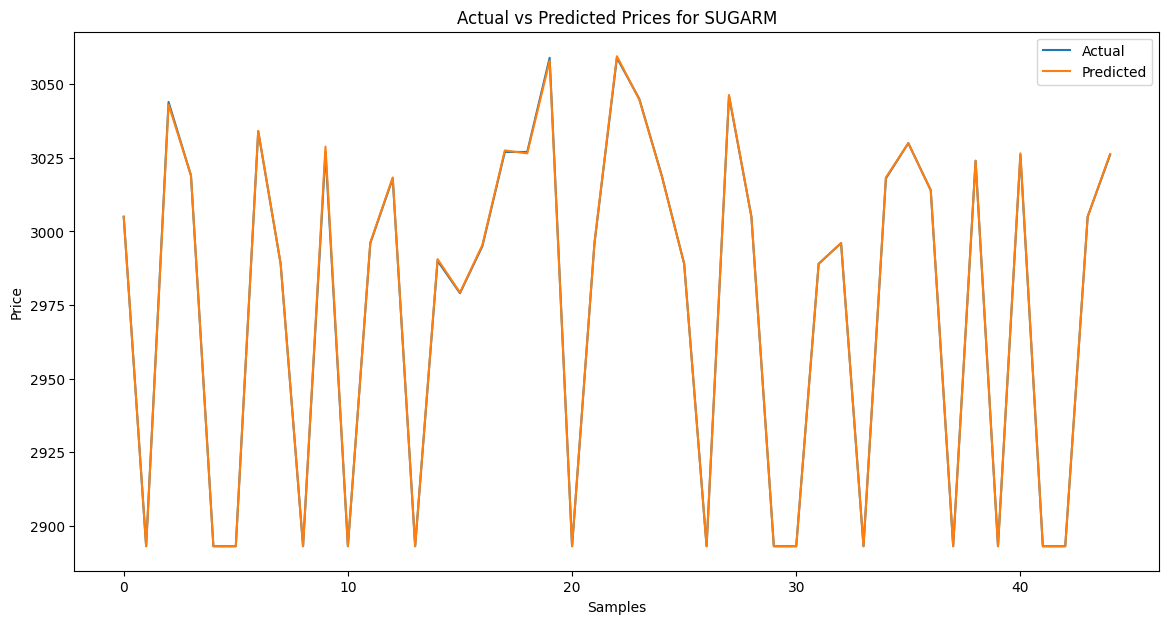

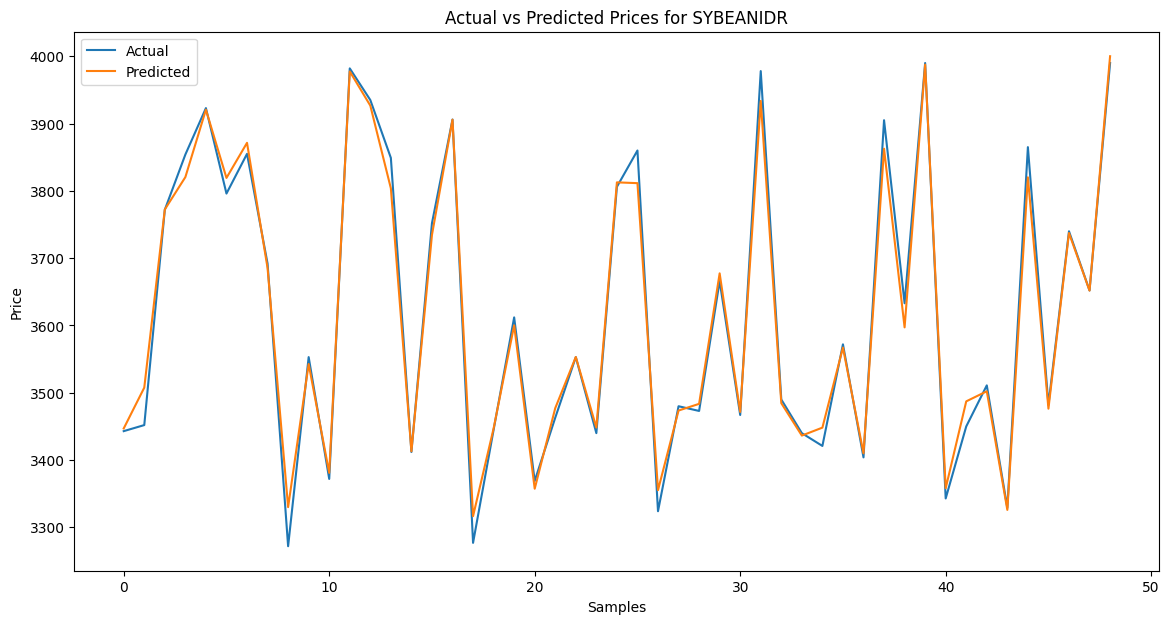

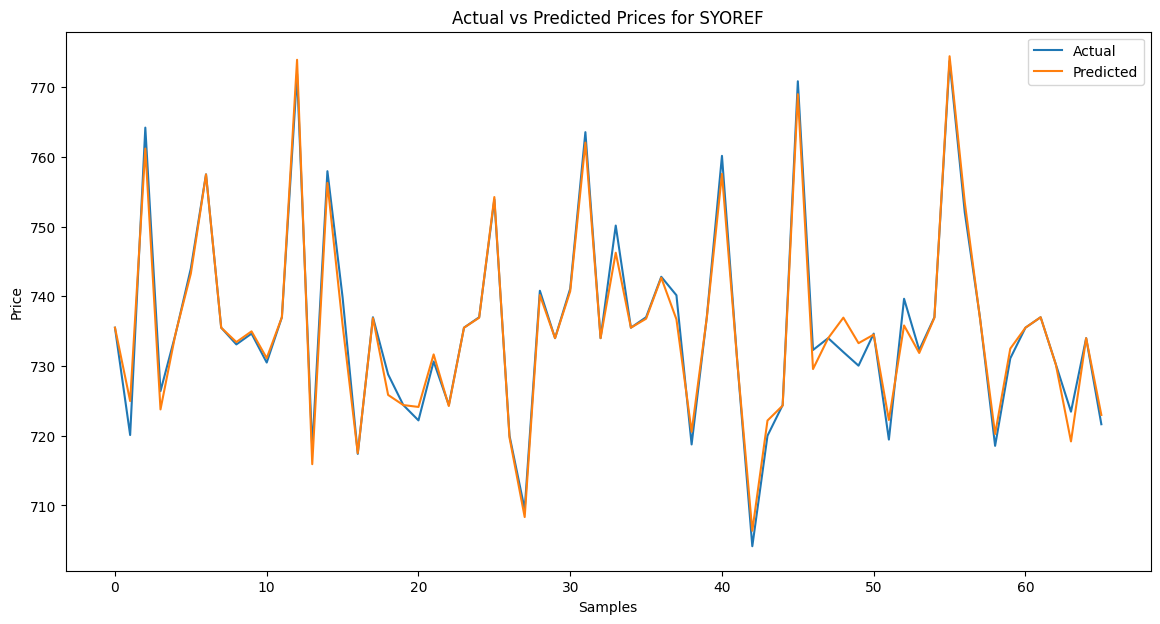

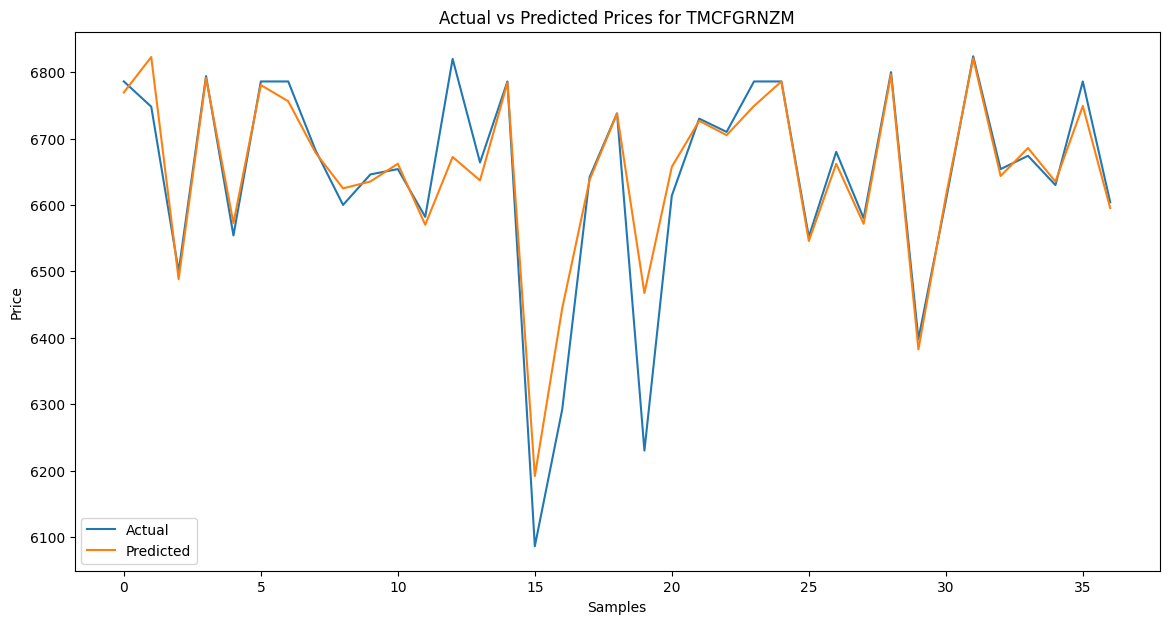

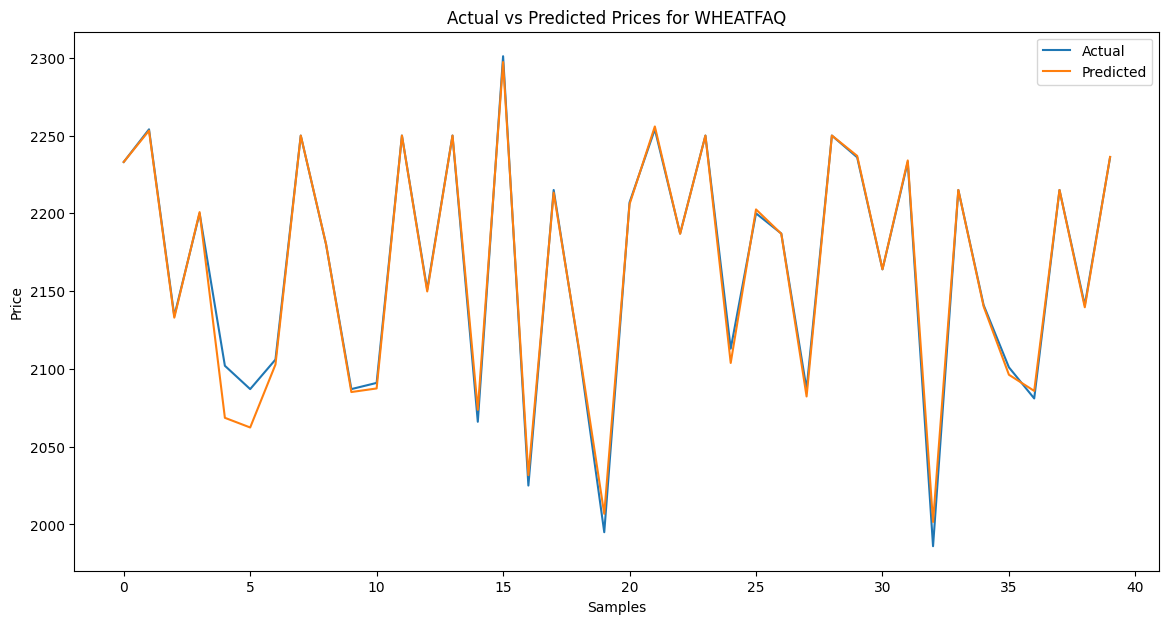

In [29]:
import matplotlib.pyplot as plt

# Visualization of results
for symbol, result in results.items():
    y_test = result['y_test']
    y_pred = result['y_pred']

    plt.figure(figsize=(14, 7))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Prices for {symbol}')
    plt.legend()
    plt.show()

### Save the model

In [30]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)